<a href="https://colab.research.google.com/github/DIWEERAPURA/dasithfire.github.io/blob/main/SkinModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the paths to your dataset directories in Google Drive
dry_dir = "/content/drive/MyDrive/IC/dry"
normal_dir = "/content/drive/MyDrive/IC/normal"
oily_dir = "/content/drive/MyDrive/IC/oily"

# Function to load images and labels from a directory
def load_data_from_dir(directory):
    images = []
    labels = []
    class_name = os.path.basename(directory)
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  # Resize image to fit VGG16 input size
        images.append(image)
        labels.append(class_name)
    return np.array(images), np.array(labels)

# Load data from each directory
dry_images, dry_labels = load_data_from_dir(dry_dir)
normal_images, normal_labels = load_data_from_dir(normal_dir)
oily_images, oily_labels = load_data_from_dir(oily_dir)

# Combine data from all classes
images = np.concatenate((dry_images, normal_images, oily_images), axis=0)
labels = np.concatenate((dry_labels, normal_labels, oily_labels), axis=0)

# Map labels to integers
label_map = {"dry": 0, "normal": 1, "oily": 2}
labels = np.array([label_map[label] for label in labels])

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

# Print shapes of train and validation sets
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Validation Images Shape:", val_images.shape)
print("Validation Labels Shape:", val_labels.shape)


Mounted at /content/drive


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [1]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the paths to your dataset directories in Google Drive
dry_dir = "/content/drive/MyDrive/IC/dry"
normal_dir = "/content/drive/MyDrive/IC/normal"
oily_dir = "/content/drive/MyDrive/IC/oily"

# Function to load images and labels from a directory
def load_data_from_dir(directory):
    images = []
    labels = []
    class_name = os.path.basename(directory)
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        image = cv2.imread(image_path)
        if image is not None:  # Check if image is loaded successfully
            image = cv2.resize(image, (224, 224))  # Resize image to fit VGG16 input size
            images.append(image)
            labels.append(class_name)
        else:
            print(f"Failed to load image: {image_path}")
    return np.array(images), np.array(labels)

# Load data from each directory
dry_images, dry_labels = load_data_from_dir(dry_dir)
normal_images, normal_labels = load_data_from_dir(normal_dir)
oily_images, oily_labels = load_data_from_dir(oily_dir)

# Combine data from all classes
images = np.concatenate((dry_images, normal_images, oily_images), axis=0)
labels = np.concatenate((dry_labels, normal_labels, oily_labels), axis=0)

# Map labels to integers
label_map = {"dry": 0, "normal": 1, "oily": 2}
labels = np.array([label_map[label] for label in labels])

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

# Print shapes of train and validation sets
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Validation Images Shape:", val_images.shape)
print("Validation Labels Shape:", val_labels.shape)


Mounted at /content/drive
Failed to load image: /content/drive/MyDrive/IC/dry/vector7.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector5.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector6.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector3.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector4.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector2.svg
Failed to load image: /content/drive/MyDrive/IC/dry/kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector5.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector3.svg
Failed to load image: /content/drive/MyDrive/IC/normal/kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector6.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector2.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector.svg
Failed to load image: 

In [2]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your dataset directories
dry_dir = "/content/drive/MyDrive/IC/dry"
normal_dir = "/content/drive/MyDrive/IC/normal"
oily_dir = "/content/drive/MyDrive/IC/oily"

# Function to load and preprocess images from a directory
def load_and_preprocess_data(directory):
    images = []
    labels = []
    class_name = os.path.basename(directory)
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        image = cv2.imread(image_path)
        if image is not None:  # Check if image is loaded successfully
            image = cv2.resize(image, (224, 224))  # Resize image to 224x224
            images.append(image)
            labels.append(class_name)
        else:
            print(f"Failed to load image: {image_path}")
    return np.array(images), np.array(labels)

# Load and preprocess data from each directory
dry_images, dry_labels = load_and_preprocess_data(dry_dir)
normal_images, normal_labels = load_and_preprocess_data(normal_dir)
oily_images, oily_labels = load_and_preprocess_data(oily_dir)

# Combine data from all classes
images = np.concatenate((dry_images, normal_images, oily_images), axis=0)
labels = np.concatenate((dry_labels, normal_labels, oily_labels), axis=0)

# Map labels to integers
label_map = {"dry": 0, "normal": 1, "oily": 2}
labels = np.array([label_map[label] for label in labels])

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

# Preprocess images using VGG16 preprocess_input function
train_images = preprocess_input(train_images)
val_images = preprocess_input(val_images)

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator to the training data
train_datagen.fit(train_images)

# Print shapes of train and validation sets
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Validation Images Shape:", val_images.shape)
print("Validation Labels Shape:", val_labels.shape)


Failed to load image: /content/drive/MyDrive/IC/dry/vector7.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector5.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector6.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector3.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector4.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector2.svg
Failed to load image: /content/drive/MyDrive/IC/dry/kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector5.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector3.svg
Failed to load image: /content/drive/MyDrive/IC/normal/kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector6.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector2.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector.svg
Failed to load image: /content/drive/MyDrive/IC/

In [3]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

# Define the paths to your dataset directories
dry_dir = "/content/drive/MyDrive/IC/dry"
normal_dir = "/content/drive/MyDrive/IC/normal"
oily_dir = "/content/drive/MyDrive/IC/oily"

# Function to load and preprocess images from a directory
def load_and_preprocess_data(directory):
    images = []
    labels = []
    class_name = os.path.basename(directory)
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        image = cv2.imread(image_path)
        if image is not None:  # Check if image is loaded successfully
            image = cv2.resize(image, (224, 224))  # Resize image to 224x224
            images.append(image)
            labels.append(class_name)
        else:
            print(f"Failed to load image: {image_path}")
    return np.array(images), np.array(labels)

# Load and preprocess data from each directory
dry_images, dry_labels = load_and_preprocess_data(dry_dir)
normal_images, normal_labels = load_and_preprocess_data(normal_dir)
oily_images, oily_labels = load_and_preprocess_data(oily_dir)

# Combine data from all classes
images = np.concatenate((dry_images, normal_images, oily_images), axis=0)
labels = np.concatenate((dry_labels, normal_labels, oily_labels), axis=0)

# Map labels to integers
label_map = {"dry": 0, "normal": 1, "oily": 2}
labels = np.array([label_map[label] for label in labels])

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

# Load pre-trained VGG16 model with ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Failed to load image: /content/drive/MyDrive/IC/dry/vector7.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector5.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector6.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector3.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector4.svg
Failed to load image: /content/drive/MyDrive/IC/dry/vector2.svg
Failed to load image: /content/drive/MyDrive/IC/dry/kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector5.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector3.svg
Failed to load image: /content/drive/MyDrive/IC/normal/kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector6.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector2.svg
Failed to load image: /content/drive/MyDrive/IC/normal/vector.svg
Failed to load image: /content/drive/MyDrive/IC/

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
# Load pre-trained VGG16 model with ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Output layer with 3 neurons for skin types

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint("new_best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with frozen layers
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=32),
    steps_per_epoch=len(train_images) // 32,
    epochs=20,
    validation_data=(val_images, val_labels),
    callbacks=[checkpoint, early_stopping]
)

# Load the best model
model.load_weights("new_best_model.h5")



Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 28.8478 - accuracy: 0.4731 
Epoch 1: val_accuracy improved from -inf to 0.56604, saving model to new_best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 313s 24s/step - loss: 28.8478 - accuracy: 0.4731 - val_loss: 10.9328 - val_accuracy: 0.5660
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 25.6415 - accuracy: 0.5320 
Epoch 2: val_accuracy improved from 0.56604 to 0.59434, saving model to new_best_model.h5
13/13 [==============================] - 313s 26s/step - loss: 25.6415 - accuracy: 0.5320 - val_loss: 8.2113 - val_accuracy: 0.5943
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 18.0493 - accuracy: 0.5754 
Epoch 3: val_accuracy improved from 0.59434 to 0.66981, saving model to new_best_model.h5
13/13 [==============================] - 280s 22s/step - loss: 18.0493 - accuracy: 0.5754 - val_loss: 5.5242 - val_accuracy: 0.6698
Epoch 4/20
13/13 [==============================] - ETA: 0s - loss: 19.4255 - accuracy: 0.5243 
Epoch 4: val_accuracy improved from 0.66981 to 0.69811, saving model to new_best_model.h5
13/13 [==============================] - 286s

In [8]:
from sklearn.metrics import classification_report
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=1)

# Predict labels for the validation set
predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to original labels
true_labels = np.argmax(val_labels, axis=1)

# Calculate classification report
report = classification_report(true_labels, predicted_labels, target_names=["dry", "normal", "oily"])

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Classification Report:")
print(report)


4/4 [==============================] - 61s 14s/step
Validation Loss: 4.559614181518555
Validation Accuracy: 0.7452830076217651
Classification Report:
              precision    recall  f1-score   support

         dry       0.79      0.47      0.59        32
      normal       0.71      0.65      0.68        23
        oily       0.74      0.96      0.84        51

    accuracy                           0.75       106
   macro avg       0.75      0.69      0.70       106
weighted avg       0.75      0.75      0.73       106



In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to save the model in your Google Drive
save_path = '/content/drive/MyDrive/better_skin_type_model.h5'

# Save the model to Google Drive
model.save(save_path)

print("Model saved to Google Drive as 'better_skin_type_model.h5'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to Google Drive as 'better_skin_type_model.h5'


In [11]:
!pip install flask-ngrok


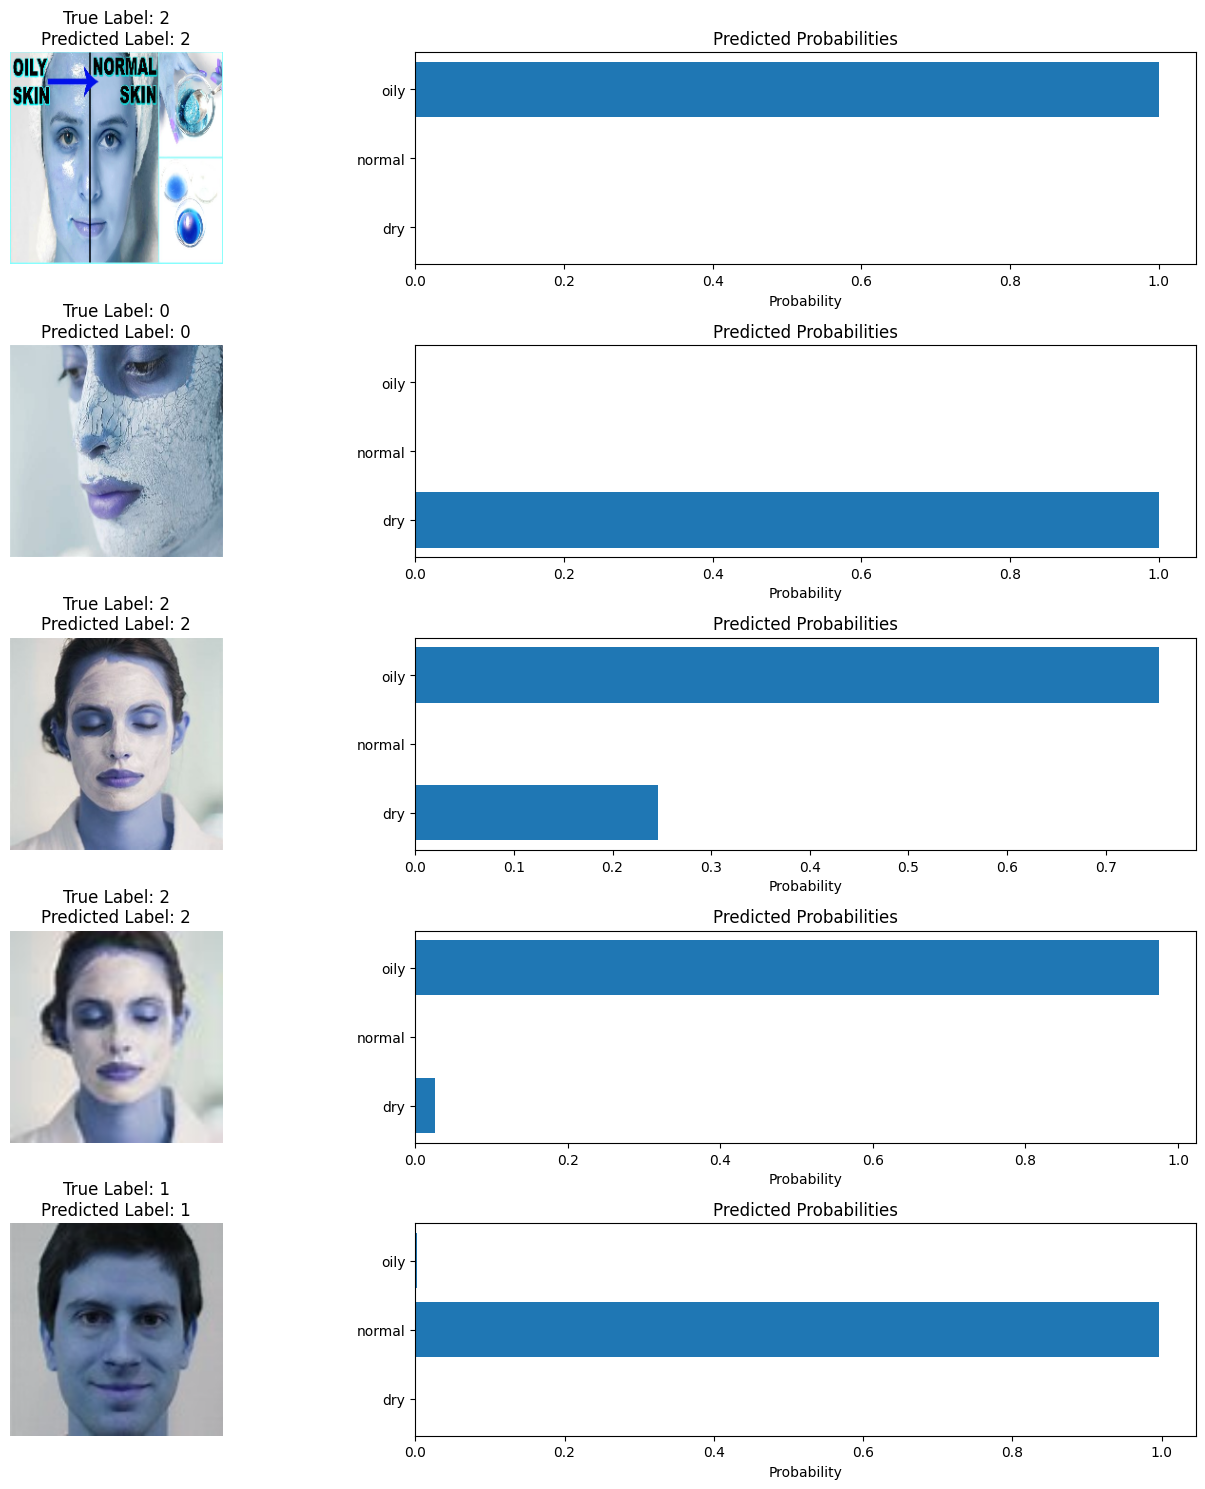

In [10]:
import matplotlib.pyplot as plt

# Define function to display images with their predicted and true labels
def display_validation_images(images, true_labels, predicted_labels, predictions_prob):
    num_images = min(5, len(images))  # Display at most 5 images
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 2, 2*i+1)
        plt.imshow(images[i])
        plt.title(f"True Label: {true_labels[i]}\nPredicted Label: {predicted_labels[i]}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2*i+2)
        plt.barh(range(len(predictions_prob[i])), predictions_prob[i])
        plt.yticks(range(len(predictions_prob[i])), ["dry", "normal", "oily"])
        plt.xlabel('Probability')
        plt.title('Predicted Probabilities')

    plt.tight_layout()
    plt.show()

# Display sample validation images with predictions
sample_indices = np.random.choice(len(val_images), 5, replace=False)
sample_images = val_images[sample_indices]
sample_true_labels = true_labels[sample_indices]
sample_predicted_labels = predicted_labels[sample_indices]
sample_predictions = predictions[sample_indices]

display_validation_images(sample_images, sample_true_labels, sample_predicted_labels, sample_predictions)


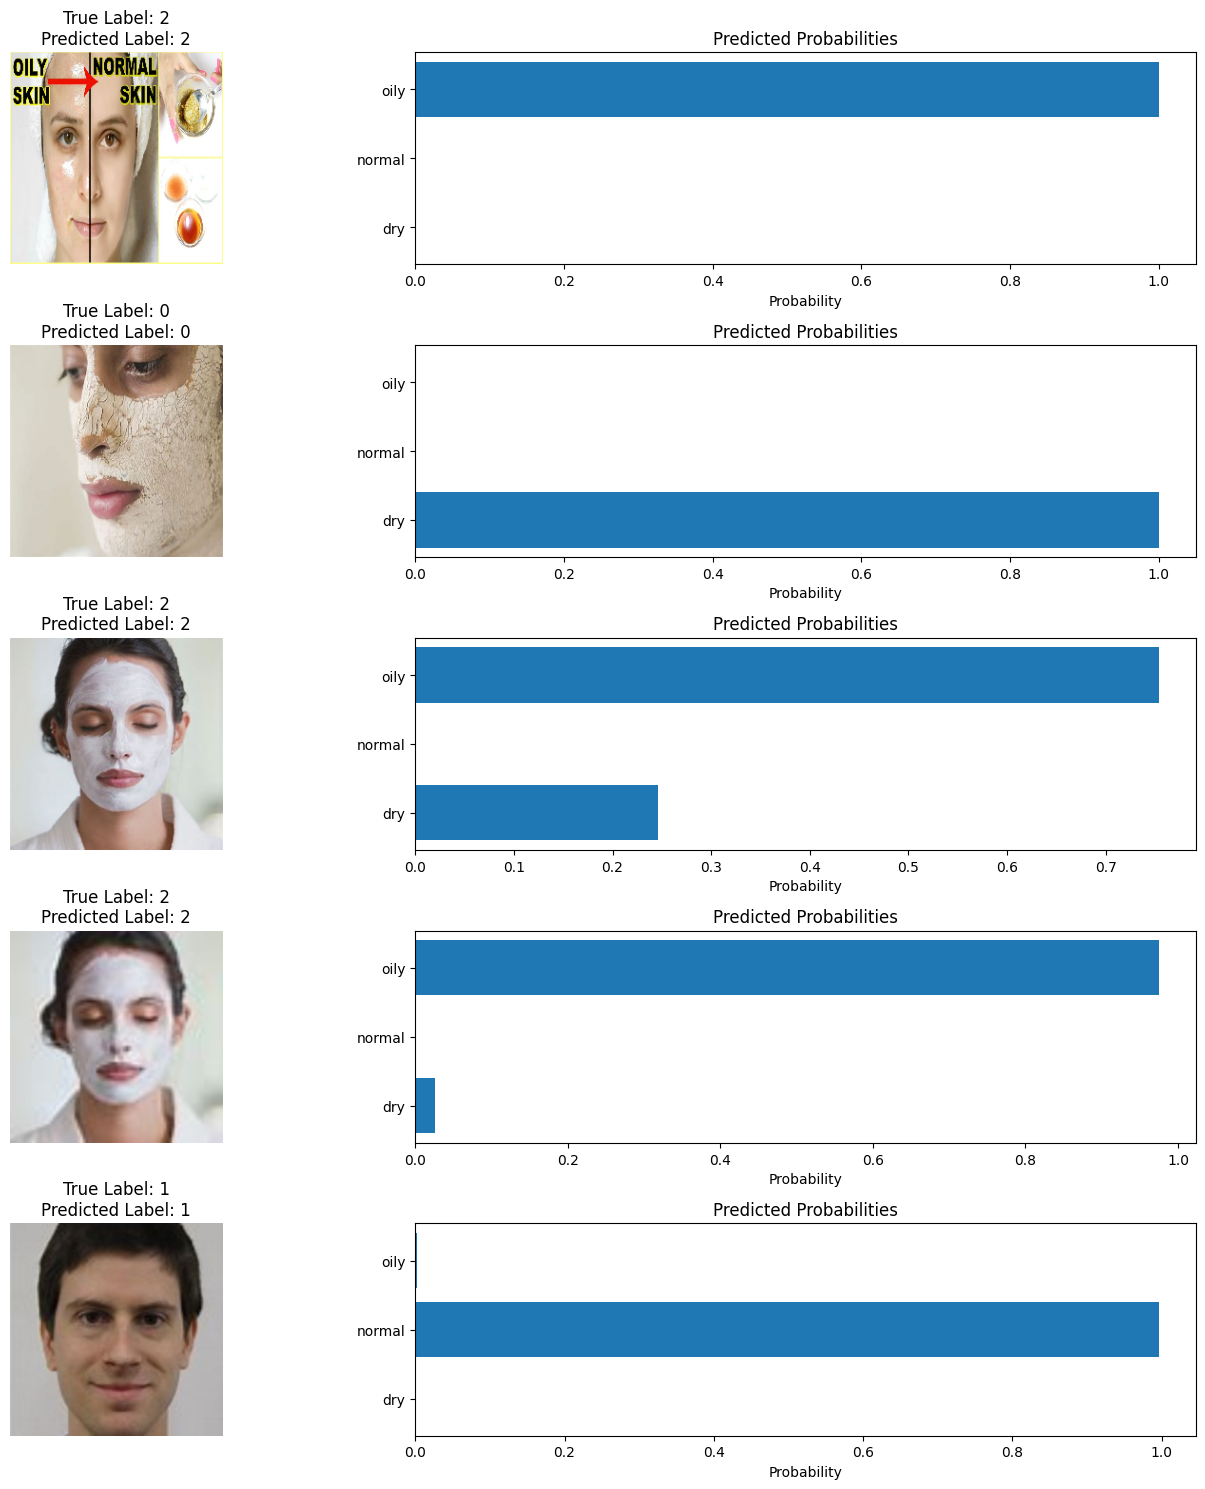

In [11]:
import matplotlib.pyplot as plt

# Define function to convert images to RGB format
def convert_to_rgb(images):
    rgb_images = []
    for img in images:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rgb_images.append(rgb_img)
    return rgb_images

# Define function to display images with their predicted and true labels
def display_validation_images(images, true_labels, predicted_labels, predictions_prob):
    num_images = min(5, len(images))  # Display at most 5 images
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 2, 2*i+1)
        plt.imshow(images[i])
        plt.title(f"True Label: {true_labels[i]}\nPredicted Label: {predicted_labels[i]}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2*i+2)
        plt.barh(range(len(predictions_prob[i])), predictions_prob[i])
        plt.yticks(range(len(predictions_prob[i])), ["dry", "normal", "oily"])
        plt.xlabel('Probability')
        plt.title('Predicted Probabilities')

    plt.tight_layout()
    plt.show()

# Convert images to RGB format
sample_rgb_images = convert_to_rgb(sample_images)

# Display sample validation images with predictions
display_validation_images(sample_rgb_images, sample_true_labels, sample_predicted_labels, sample_predictions)


In [15]:
!mkdir /content/templates


In [16]:
!mv /content/upload.html /content/templates
!mv /content/result.html /content/templates


In [52]:
!pip install flask-ngrok
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

app = Flask(__name__, template_folder='/content/templates')

run_with_ngrok(app)  #starts ngrok when the app is run

# Load the trained model
model = load_model('/content/skin_type_detection_model.h5')

# Function to preprocess image
def preprocess_img(img):
    img = cv2.resize(img, (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Function to predict skin type
def predict_skin_type(img):
    img = preprocess_img(img)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    skin_types = ['Dry', 'Normal', 'Oily']
    return skin_types[predicted_class]

# Route to render the upload form
@app.route('/')
def upload_form():
    return render_template('upload.html')

# Route to handle the uploaded image and make predictions
@app.route('/upload', methods=['POST'])
def upload_image():
    uploaded_file = request.files['file']
    if uploaded_file.filename != '':
        img = cv2.imdecode(np.frombuffer(uploaded_file.read(), np.uint8), cv2.IMREAD_COLOR)
        predicted_skin = predict_skin_type(img)
        return render_template('result.html', skin_type=predicted_skin)
    else:
        return 'Error: No file uploaded'

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://ca5a-35-197-29-191.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


In [30]:
!ngrok authtoken 2ertwvfQ489woDQHXuynoAUPb4M_7CSgxB5yJ86AdVF2LSygx

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [57]:
!mv /content/index.html /content/templates

In [2]:
!pip  install flask_ngrok

In [4]:
from flask_ngrok import run_with_ngrok
from flask import Flask

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home():
    return "Running Flask on Google Colab!"

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll